In [40]:
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random 

from sklearn.model_selection import ParameterGrid

import warnings
warnings.filterwarnings("ignore")

# Part I

### Generating Random Data that forms three clusters

K Means Clustering: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [41]:
data_1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data_2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data_3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], 
                       dtype=np.float64)

data = np.append(np.append(data_1, data_2, axis=0), data_3, axis=0)

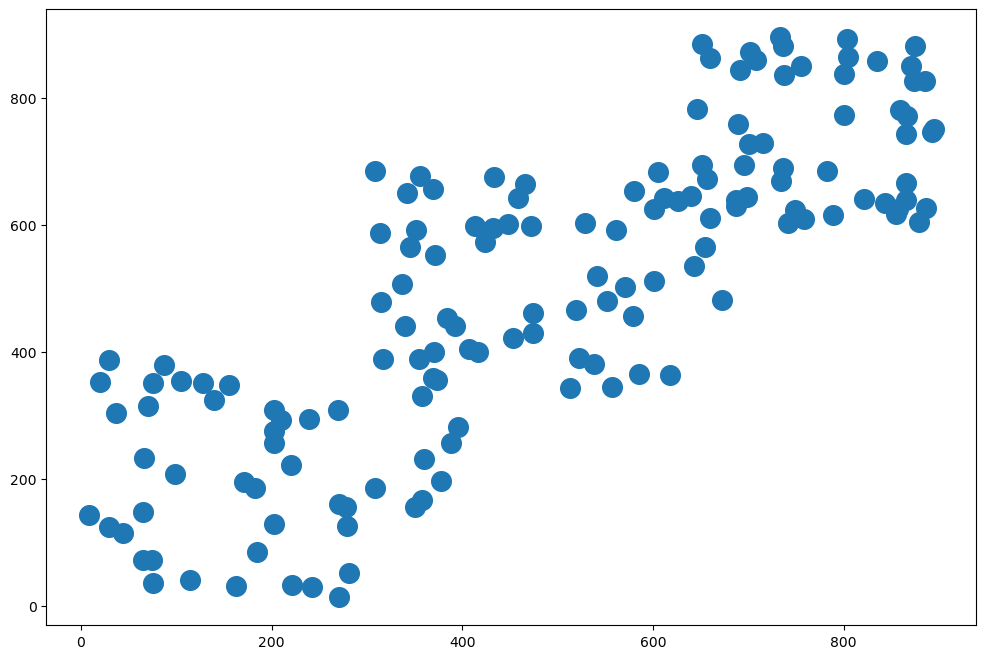

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(data[:,0], data[:,1], s=200)

### Setting Labels to the data

In [43]:
labels_1 = np.array([0 for i in range(50)])
labels_2 = np.array([1 for i in range(50)])
labels_3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels_1, labels_2, axis=0), labels_3, axis=0)
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})
df.sample(10)

,data_x,data_y,labels
5,271.0,160.0,0
33,360.0,231.0,0
42,242.0,29.0,0
84,371.0,552.0,1
130,801.0,774.0,2
27,163.0,30.0,0
81,337.0,507.0,1
65,657.0,672.0,1
13,221.0,33.0,0
74,342.0,650.0,1


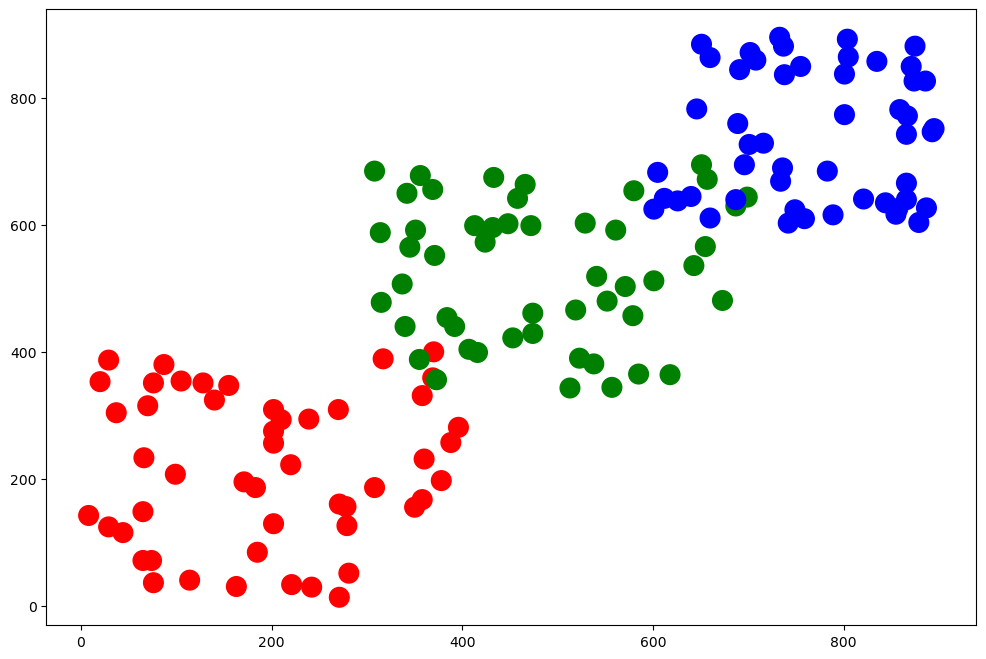

In [44]:
colors = ['red', 'green','blue']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, 
            cmap=matplotlib.colors.ListedColormap(colors))

### Plotting the centroids

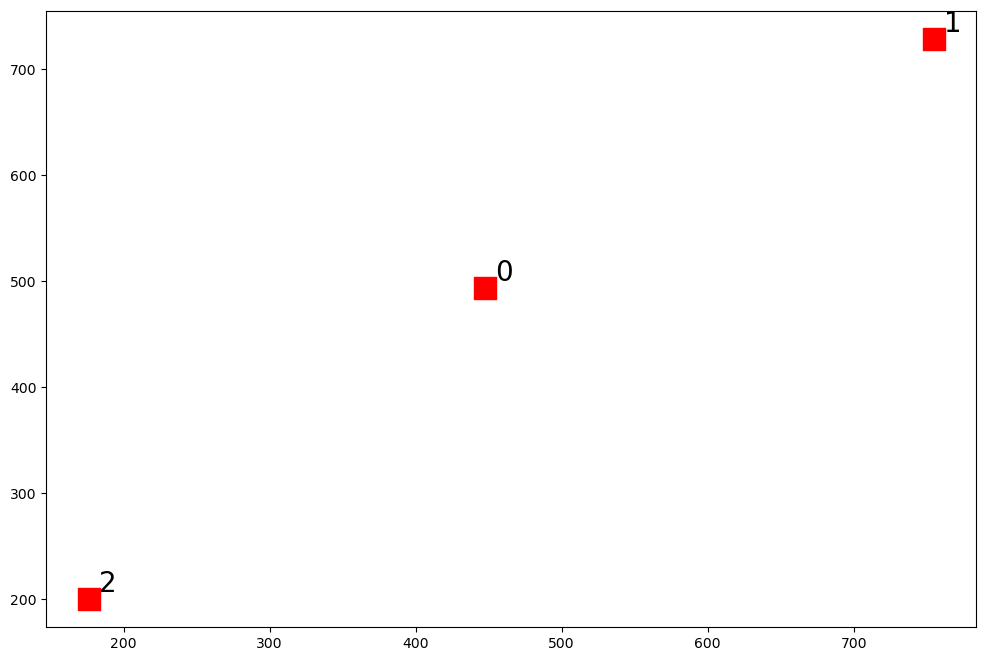

In [45]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

centroids = kmeans_model.cluster_centers_

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

### Performance Metrics

In [46]:
print("Homogeneity_score: ", metrics.homogeneity_score(labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.7863022341276694
Completeness_score:  0.7892488956798509
v_measure_score:  0.7877728094189844
Adjusted_rand_score:  0.7958934591036152
Adjusted_mutual_info_score:  0.7851113088261322
Silhouette_score:  0.5020457228625287


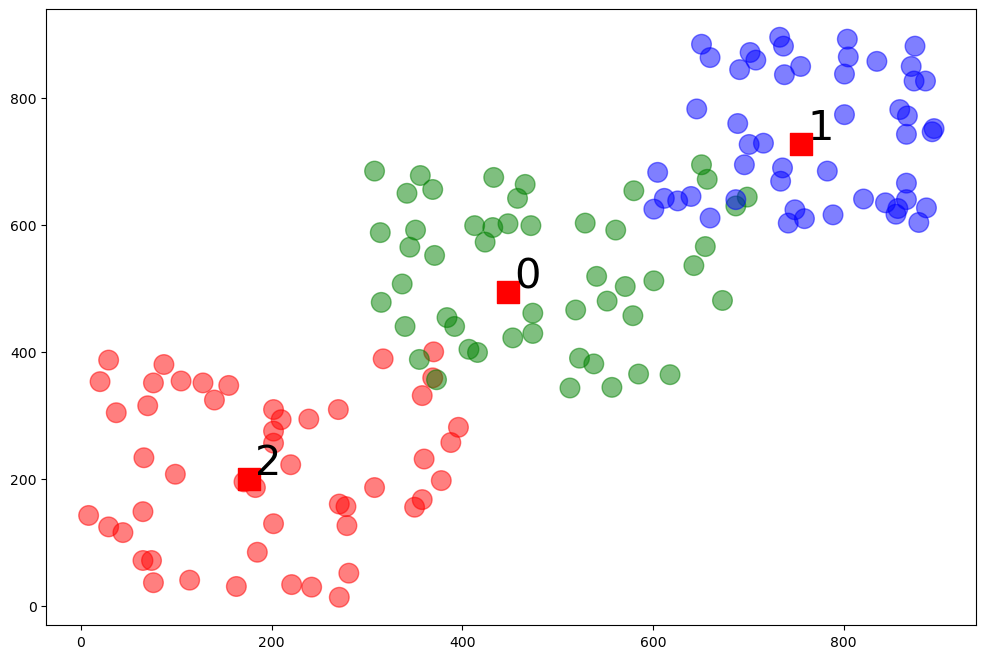

In [47]:
colors = ['red', 'green','blue']
plt.figure(figsize=(12, 8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')
for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [48]:
data_test = np.array([[random.randint(1, 100) for i in range(2)],
                      [random.randint(100, 200) for i in range(2)],
                      [random.randint(200, 300) for i in range(2)],
                      [random.randint(300, 400) for i in range(2)],
                      [random.randint(400, 500) for i in range(2)],
                      [random.randint(500, 600) for i in range(2)],
                      [random.randint(600, 700) for i in range(2)],
                      [random.randint(700, 800) for i in range(2)],
                      [random.randint(800, 900) for i in range(2)]])

In [49]:
label_pred = kmeans_model.predict(data_test)
label_pred

array([2, 2, 2, 0, 0, 0, 1, 1, 1], dtype=int32)

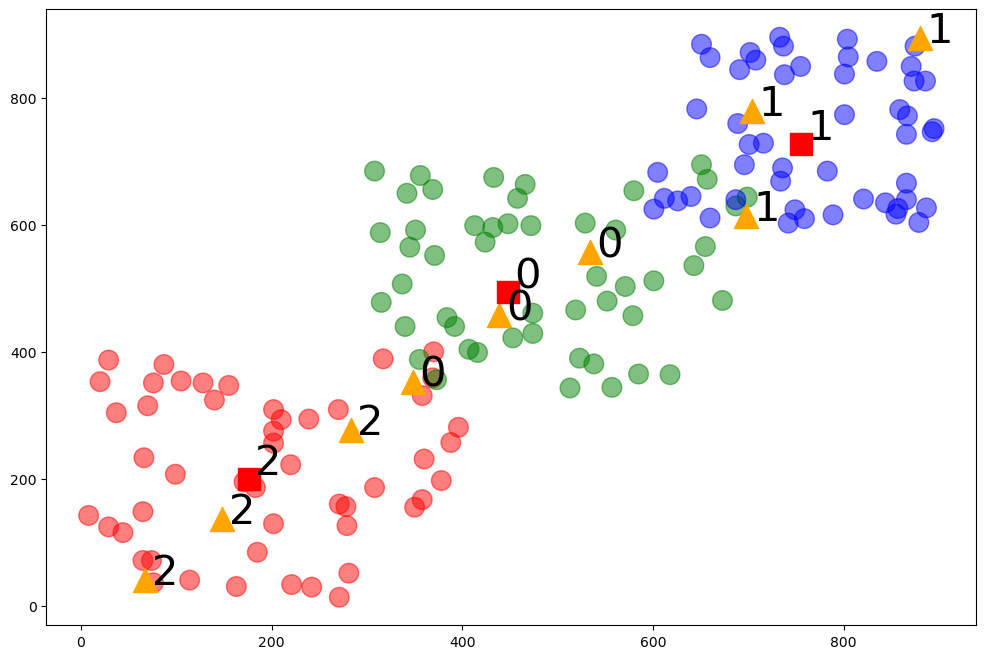

In [50]:
colors = ['red','green','blue']

plt.figure(figsize=(12, 8))

plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
    
plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')

for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)
    
plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

# Part II

### Exploring the Iris Dataset

Source: https://www.kaggle.com/datasets/saurabh00007/iriscsv

In [51]:
iris_df = pd.read_csv('datasets/iris.csv', skiprows=1, names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])
label_encoding = preprocessing.LabelEncoder()
iris_df['class'] = label_encoding.fit_transform(iris_df['class'].astype(str))

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [52]:
iris_df[iris_df.isnull().any(axis=1)]

,sepal-length,sepal-width,petal-length,petal-width,class


In [53]:
iris_df.describe()

,sepal-length,sepal-width,petal-length,petal-width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [54]:
iris_df['class'].unique()

array([0, 1, 2])

In [55]:
FEATURES = list(iris_df.columns[:-1])
FEATURES

['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

In [56]:
feature_pairs = [[a, b] for idx, a in enumerate(FEATURES) for b in FEATURES[idx + 1:]]
feature_pairs

[['sepal-length', 'sepal-width'],
 ['sepal-length', 'petal-length'],
 ['sepal-length', 'petal-width'],
 ['sepal-width', 'petal-length'],
 ['sepal-width', 'petal-width'],
 ['petal-length', 'petal-width']]

### Relationships between 2 features

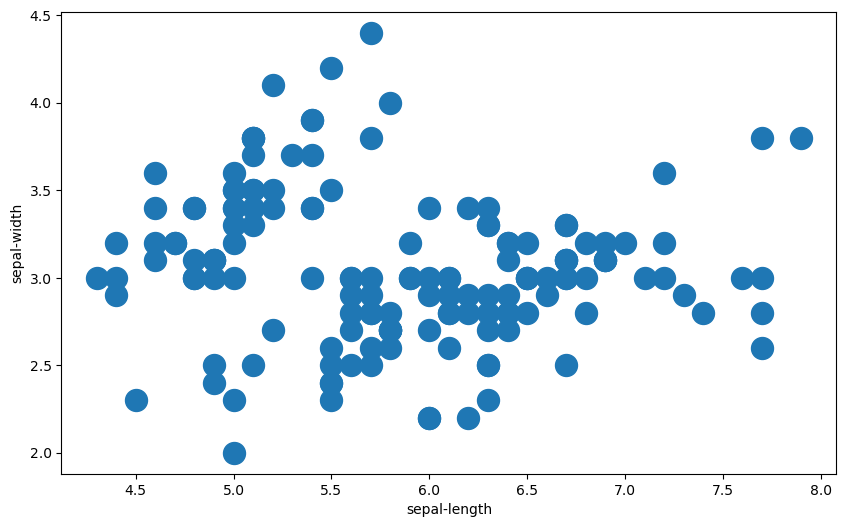

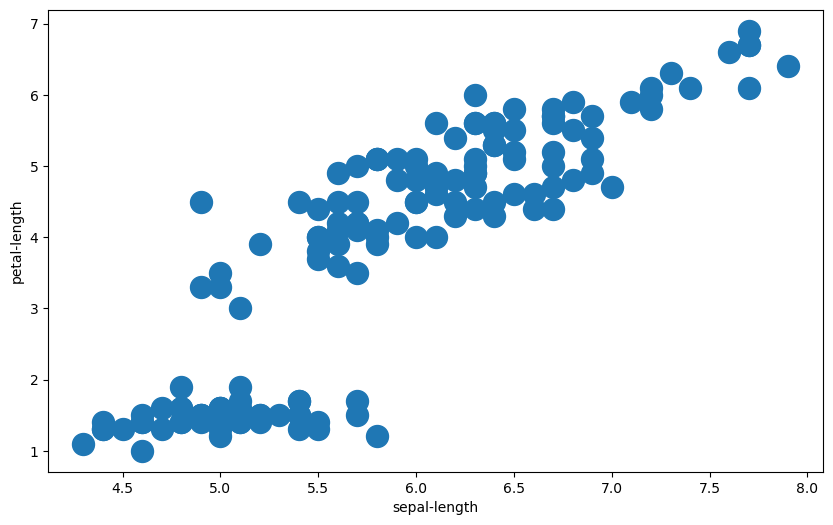

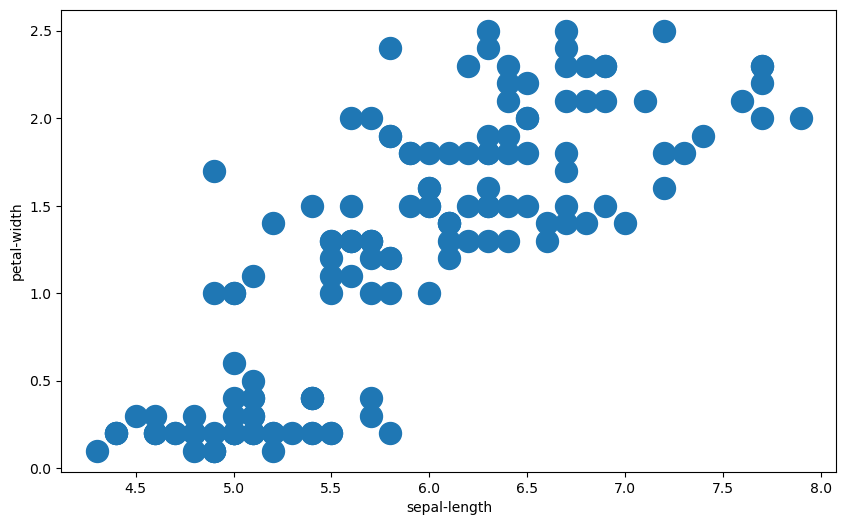

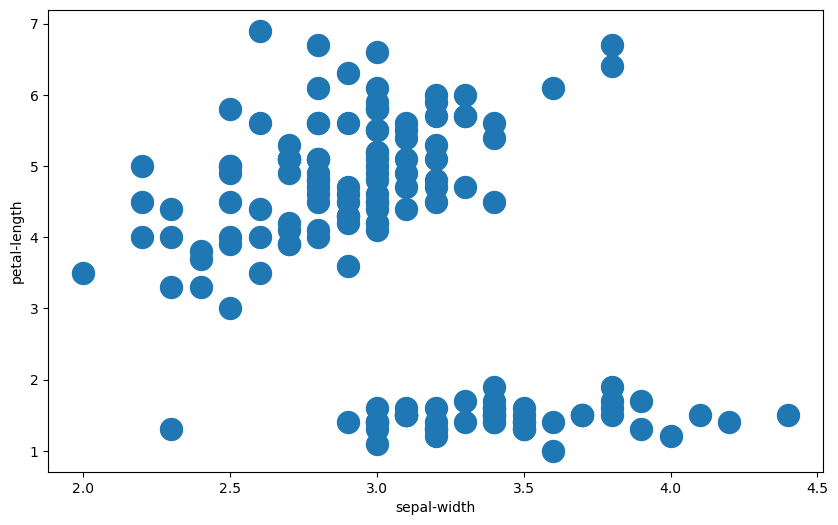

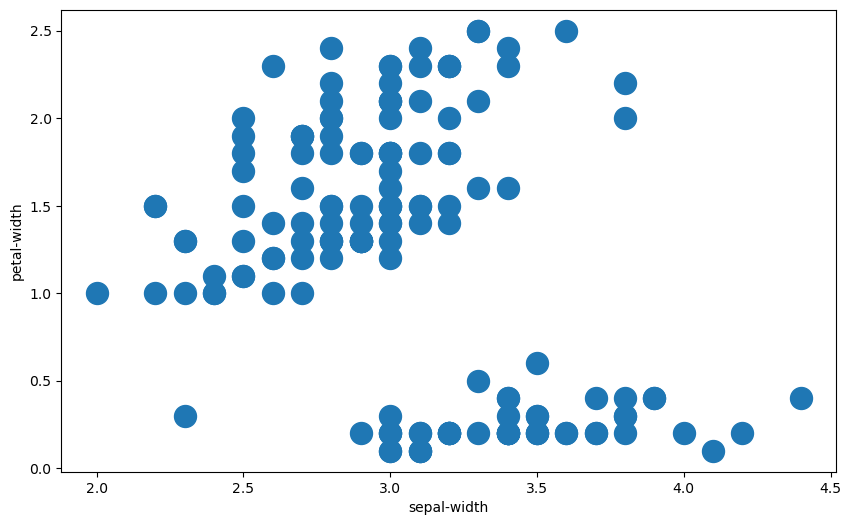

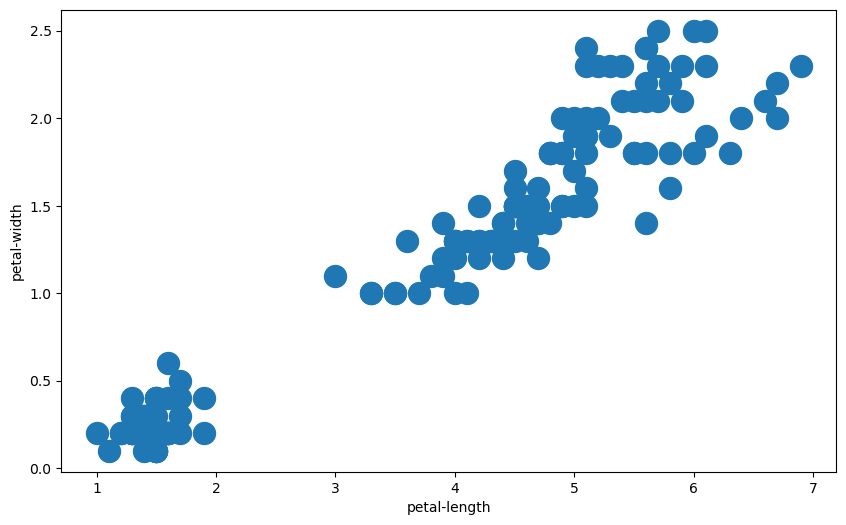

In [57]:
for feature_pair in feature_pairs:
    fig, ax = plt.subplots(figsize=(10, 6))

    plt.scatter(iris_df[feature_pair[0]], iris_df[feature_pair[1]], s=250)

    plt.xlabel(feature_pair[0])
    plt.ylabel(feature_pair[1])

    plt.show()

### K Means Clustering on different feature pairs

For sepal-length vs sepal-width


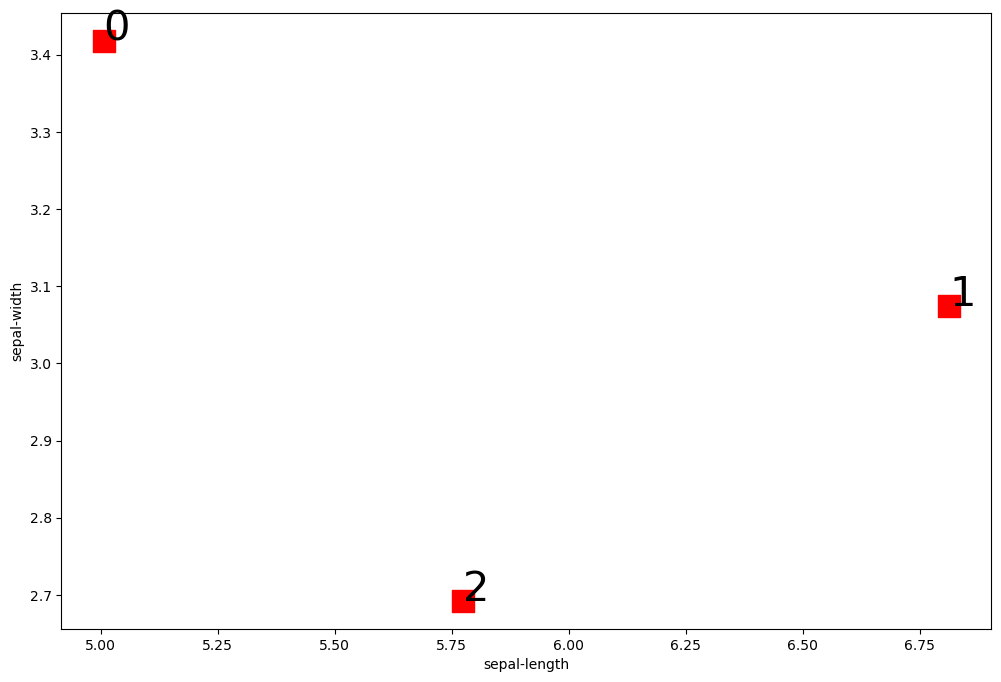

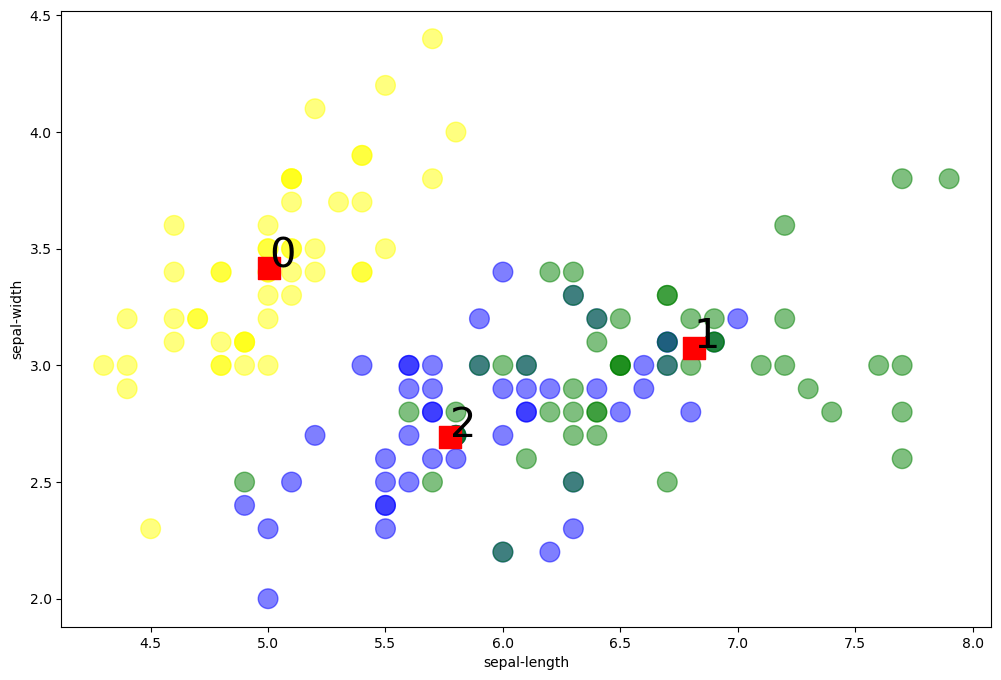

Homogeneity_score:  0.6463579841342947
Completeness_score:  0.6470651897561797
v_measure_score:  0.6467113936056552
Adjusted_rand_score:  0.6006861021484542
Adjusted_mutual_info_score:  0.6422873687639807
Silhouette_score:  0.4434693231245125
For sepal-length vs petal-length


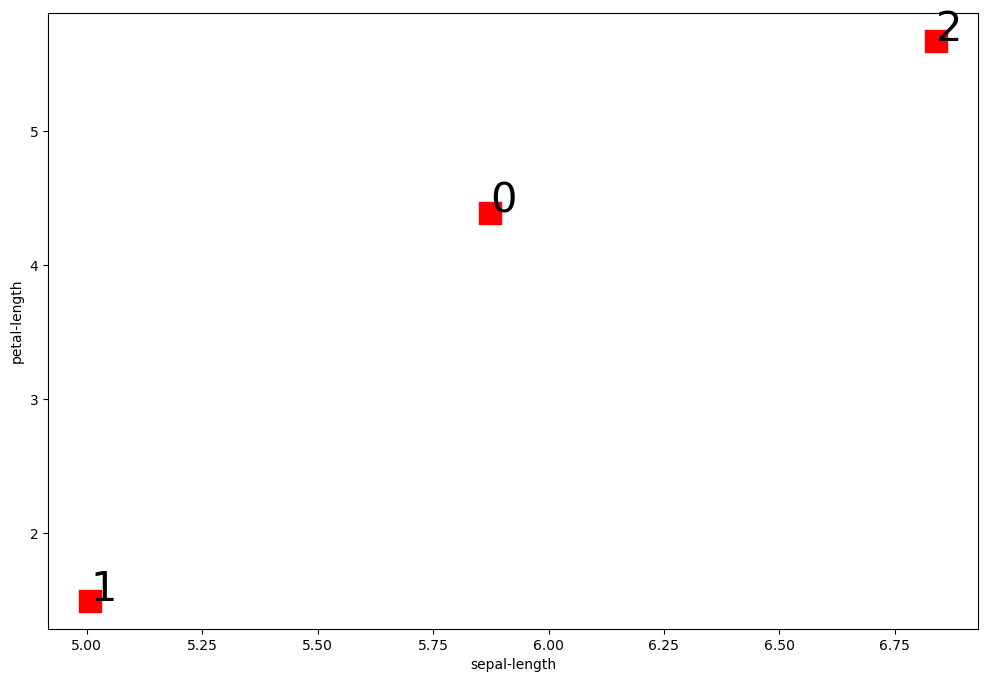

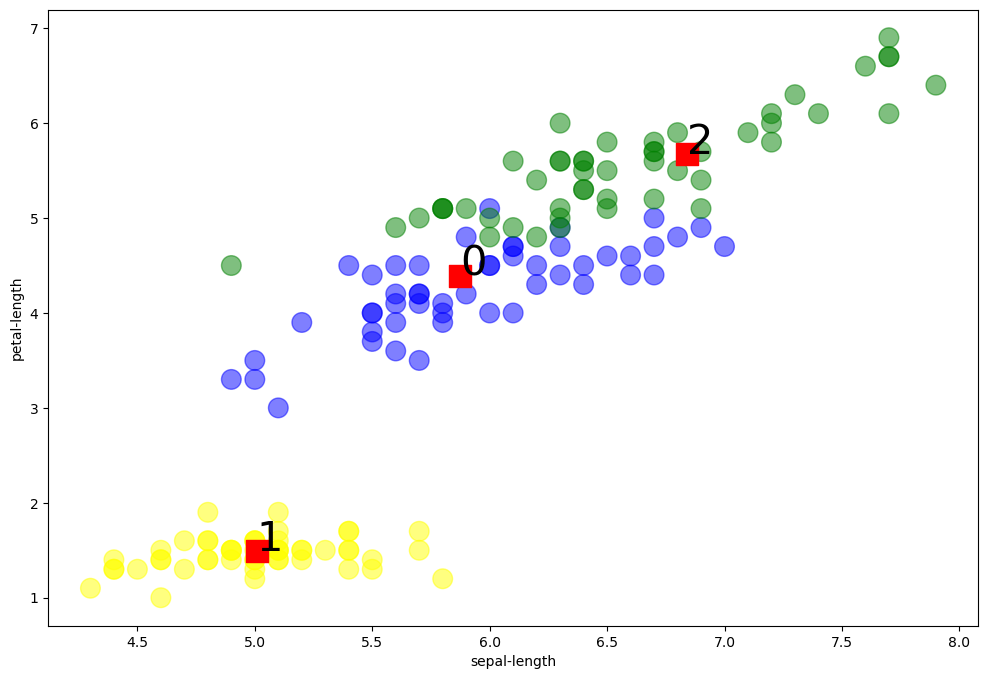

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409132
Silhouette_score:  0.5890612474062569
For sepal-length vs petal-width


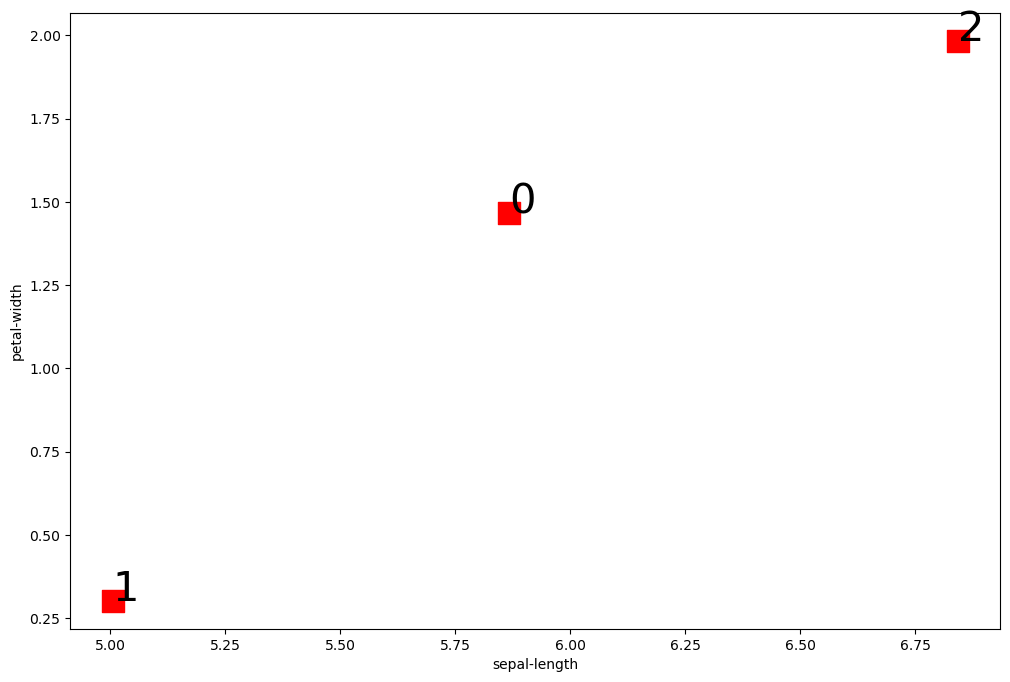

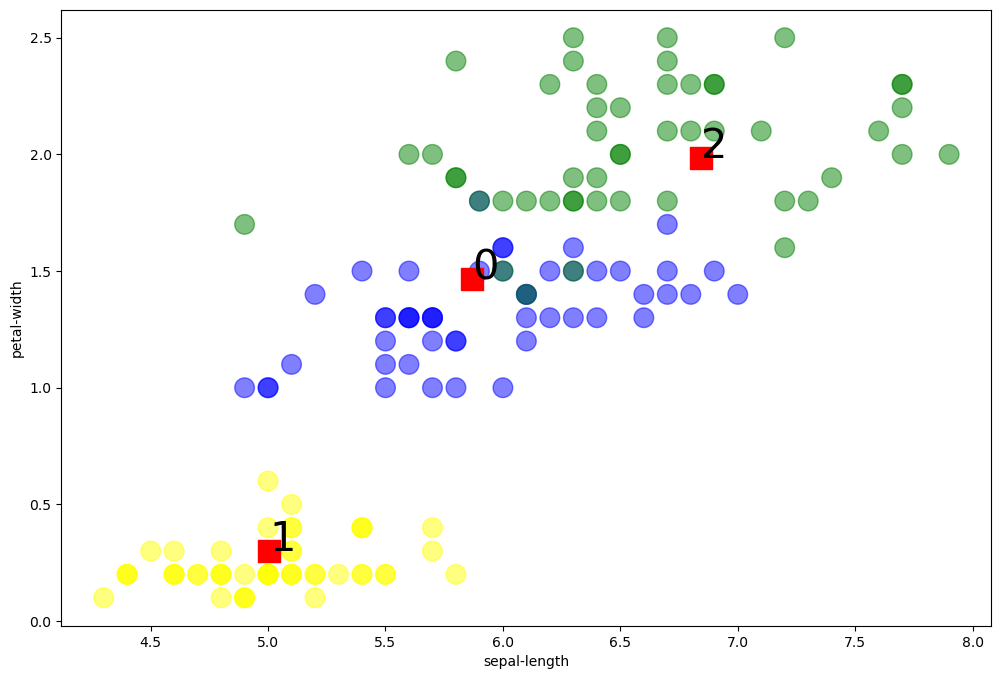

Homogeneity_score:  0.5886270365870242
Completeness_score:  0.5906726463794539
v_measure_score:  0.5896480673288476
Adjusted_rand_score:  0.5726832765728626
Adjusted_mutual_info_score:  0.584502644942172
Silhouette_score:  0.5038084350159747
For sepal-width vs petal-length


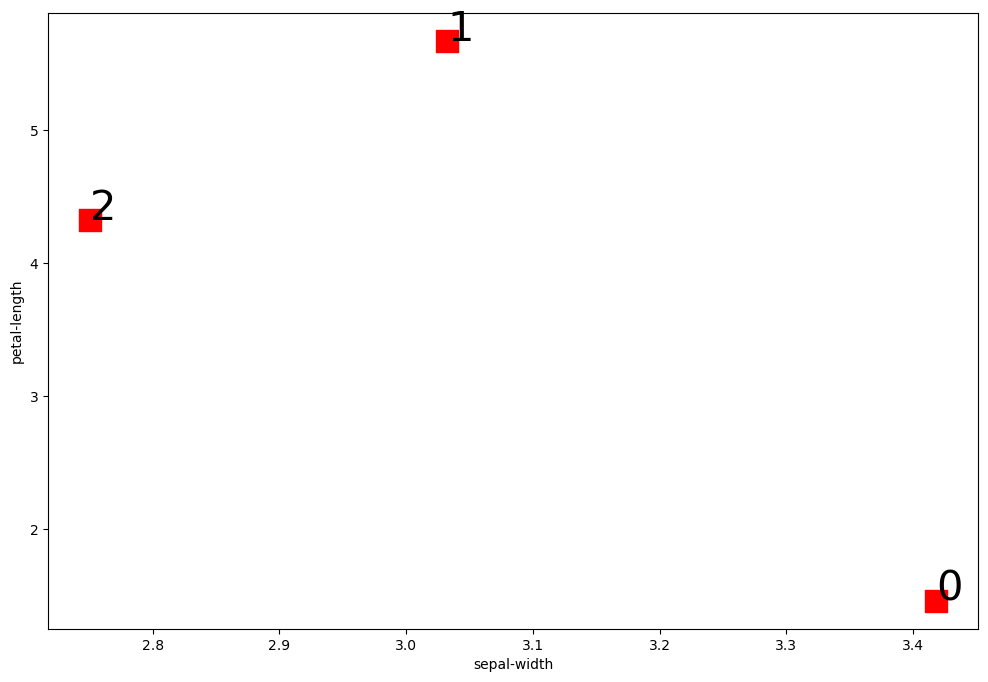

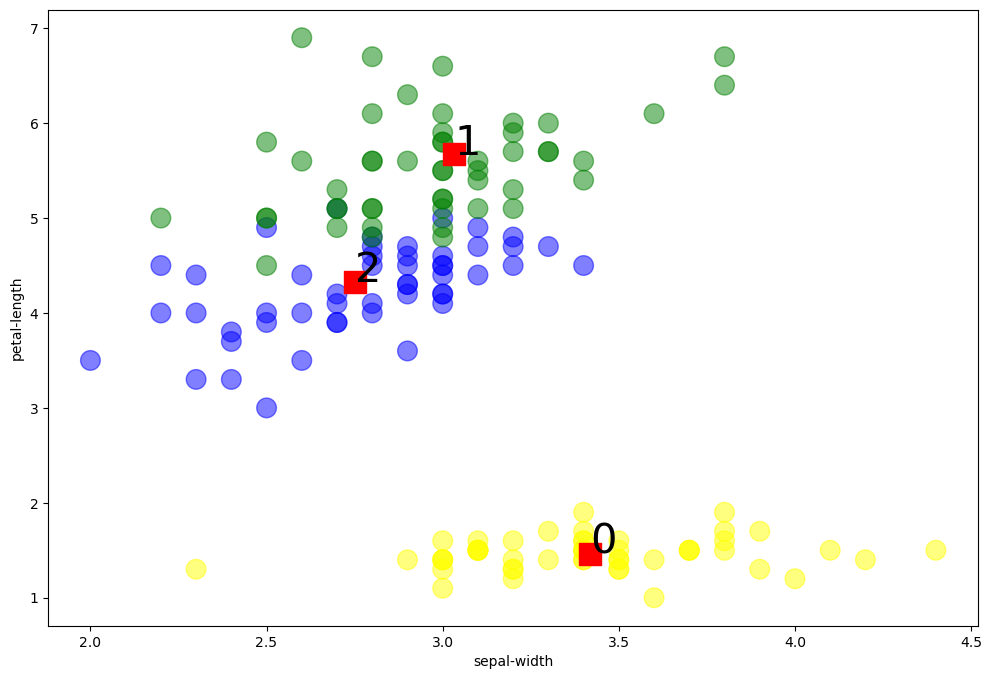

Homogeneity_score:  0.8000501252615821
Completeness_score:  0.804852257528353
v_measure_score:  0.8024440070096258
Adjusted_rand_score:  0.8022085453675192
Adjusted_mutual_info_score:  0.7999633909970613
Silhouette_score:  0.5930654335803219
For sepal-width vs petal-width


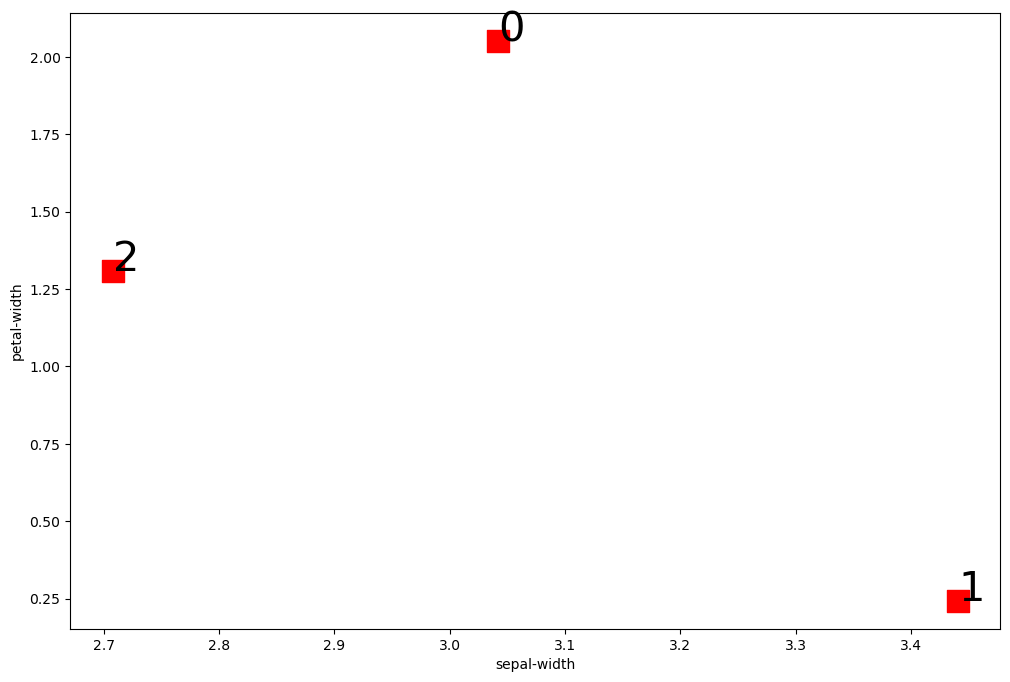

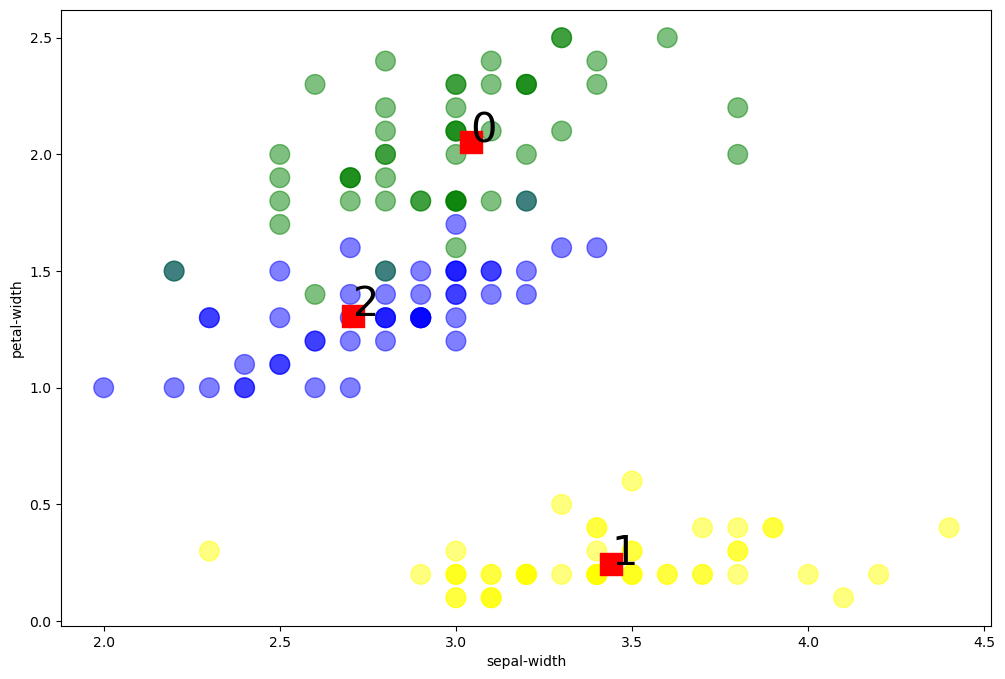

Homogeneity_score:  0.77349887710709
Completeness_score:  0.7741512245071069
v_measure_score:  0.7738249133221689
Adjusted_rand_score:  0.7971747056191755
Adjusted_mutual_info_score:  0.7709930529527879
Silhouette_score:  0.5278629952927835
For petal-length vs petal-width


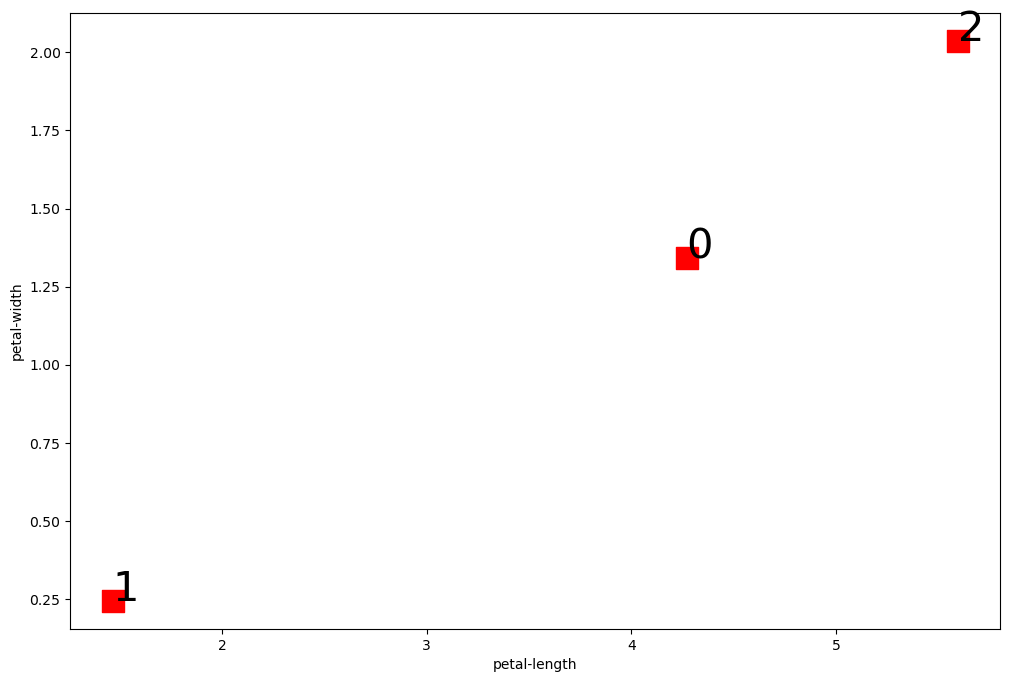

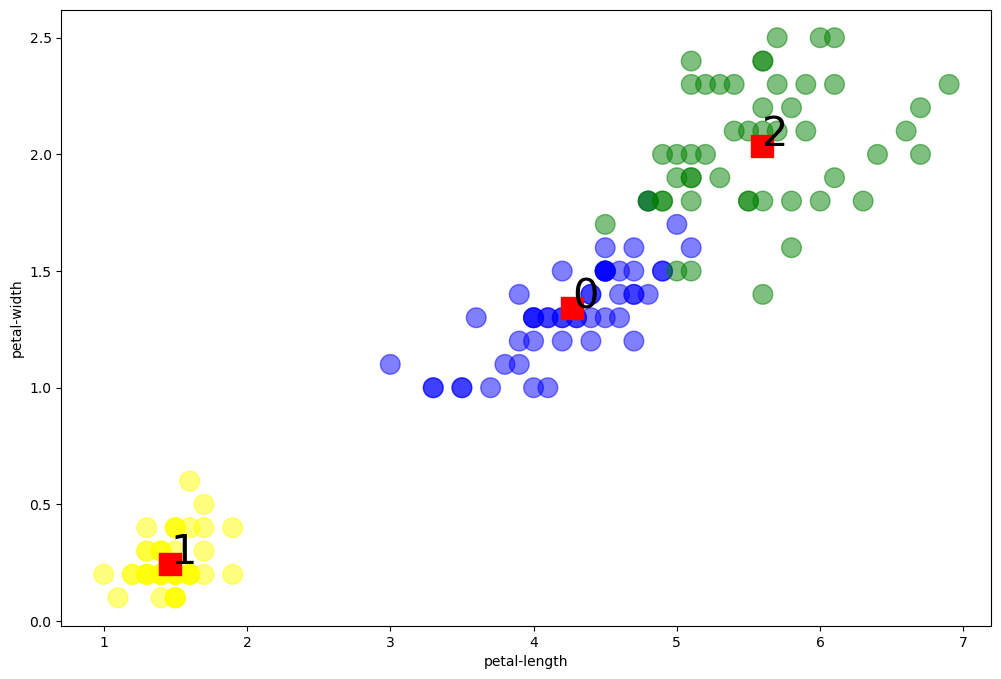

Homogeneity_score:  0.8639756867013153
Completeness_score:  0.8643954288752763
v_measure_score:  0.8641855068202222
Adjusted_rand_score:  0.8856970310281228
Adjusted_mutual_info_score:  0.8624853568628785
Silhouette_score:  0.6602760883241134


In [58]:
for feature_pair in feature_pairs:
    iris_2D = iris_df[feature_pair]
    iris_2D = np.array(iris_2D)
    kmeans_model_2D = KMeans(n_clusters=3, max_iter=1000).fit(iris_2D)

    centroids_2D = kmeans_model_2D.cluster_centers_

    centroids_2D

    print("For " + feature_pair[0] + " vs " + feature_pair[1])

    fig, ax = plt.subplots(figsize=(12, 8))

    plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

    for i in range(len(centroids_2D)):
        plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)
    
    plt.xlabel(feature_pair[0])
    plt.ylabel(feature_pair[1])
    
    plt.show()


    colors = ['yellow','blue','green']

    plt.figure(figsize=(12, 8))

    plt.scatter(iris_df[feature_pair[0]], iris_df[feature_pair[1]], c=iris_df['class'], s=200,
                cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

    plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s=250, marker='s')

    for i in range(len(centroids_2D)):
        plt.annotate( i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize=30)

    plt.xlabel(feature_pair[0])
    plt.ylabel(feature_pair[1])
    
    plt.show()

    iris_labels = iris_df['class']

    print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_))

    print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model_2D.labels_))

    print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_))

    print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_))

    print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model_2D.labels_))

    print("Silhouette_score: ", metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_))

   



### Clustering on all the features

In [59]:
iris_features = iris_df.drop('class', axis=1)
iris_labels = iris_df['class']

kmeans_model = KMeans(n_clusters=3).fit(iris_features)

kmeans_model.cluster_centers_

print("Homogeneity_score: ", metrics.homogeneity_score(iris_labels, kmeans_model.labels_))
print("Completeness_score: ", metrics.completeness_score(iris_labels, kmeans_model.labels_))
print("v_measure_score: ", metrics.v_measure_score(iris_labels, kmeans_model.labels_))
print("Adjusted_rand_score: ", metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_))
print("Adjusted_mutual_info_score: ", metrics.adjusted_mutual_info_score(iris_labels,  kmeans_model.labels_))
print("Silhouette_score: ", metrics.silhouette_score(iris_features, kmeans_model.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_score:  0.7551191675800483
Silhouette_score:  0.5525919445499754


# Part III
### Clustering using Different Methods

K Means: https://en.wikipedia.org/wiki/K-means_clustering, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Agglomerative: https://towardsdatascience.com/breaking-down-the-agglomerative-clustering-process-1c367f74c7c2, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

DBSCAN: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html, https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/

Mean Shift: https://towardsdatascience.com/understanding-mean-shift-clustering-and-implementation-with-python-6d5809a2ac40, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

Birch: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html, https://medium.com/@noel.cs21/balanced-iterative-reducing-and-clustering-using-heirachies-birch-5680adffaa58

Afinity: https://en.wikipedia.org/wiki/Affinity_propagation, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html

Mini Batch: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html, https://www.geeksforgeeks.org/ml-mini-batch-k-means-clustering-algorithm/



In [60]:
def build_model(clustering_model, data, labels):
    
    model = clustering_model(data)

    print('homo\tcompl\tv-meas\tARI\tAMI\tsilhouette')
    print(50 * '-')
    
    print('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          %(metrics.homogeneity_score(labels, model.labels_),
            metrics.completeness_score(labels, model.labels_),
            metrics.v_measure_score(labels, model.labels_),
            metrics.adjusted_rand_score(labels, model.labels_),
            metrics.adjusted_mutual_info_score(labels,  model.labels_),
            metrics.silhouette_score(data, model.labels_)))

def k_means(data, n_clusters=3, max_iter=1000):
    model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)
    
    return model

def agglomerative_fn(data, n_clusters=3):
    model = AgglomerativeClustering(n_clusters = n_clusters).fit(data)
    
    return model

def dbscan_fn(data, eps=0.45, min_samples=4):
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    return model

def mean_shift_fn(data, bandwidth=0.85):
    model = MeanShift(bandwidth=bandwidth).fit(data)
    return model

def birch_fn(data, n_clusters=3):
    model = Birch(n_clusters=n_clusters).fit(data)
    return model

def affinity_propagation_fn(data, damping=0.6, max_iter=1000):
    model = AffinityPropagation(damping=damping, max_iter=max_iter).fit(data)
    return model

def mini_batch_kmeans_fn(data, n_clusters=3, max_iter=1000):
    model = MiniBatchKMeans(n_clusters=n_clusters, max_iter=max_iter, batch_size=20).fit(data)
    return model

In [61]:
methods = [k_means, agglomerative_fn, dbscan_fn, mean_shift_fn, birch_fn, affinity_propagation_fn, mini_batch_kmeans_fn]
names = ["k_means", "agglomerative_fn", "dbscan_fn", "mean_shift_fn", "birch_fn", "affinity_propagation_fn", "mini_batch_kmeans_fn"]

In [62]:
for idx, method in enumerate(methods):
    
    print("For the " + str(names[idx]) + " method: ")
    build_model(method, iris_features, iris_labels)

For the k_means method: 
homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553
For the agglomerative_fn method: 
homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554
For the dbscan_fn method: 
homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372
For the mean_shift_fn method: 
homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551
For the birch_fn method: 
homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.675	0.738	0.705	0.610	0.701	0.502
For the affinity_propagation_fn method: 
homo	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.851	0.492	0.623	0.437	0.612	0.349
For the mini_batch_kmeans_fn method: 
homo	compl	v-meas	ARI	AMI	silhouet